## Install Dependencies

In [1]:
# Need the following when downloading CSVs from AWS S3
# Used the quiet flag to reduce installation output
!pip install --quiet fsspec s3fs

## Import Libraries

In [2]:
import atoti as tt
import pandas as pd
import time
from pprint import pprint

In [3]:
atoti_unlock = False

## Load Data Into Pandas DataFrame from CSV

In [4]:
# Load credit card transaction data (2.2 GB) and calculate time to load
# start_time = time.time()
# cc_sales_df = pd.read_csv(
#     "s3://data.atoti.io/notebooks/retail-banking/credit_card_transactions_ibm.csv"
# )
# print("--- %s seconds ---" % (time.time() - start_time))

In [5]:
# cc_sales_df

In [6]:
# Load credit card transaction data (265.5 MB) and calculate time to load
# start_time = time.time()
# cc_sales_df_gzip = pd.read_csv(
#     "s3://data.atoti.io/notebooks/retail-banking/credit_card_transactions_ibm.csv.gz",
#     compression="gzip",
# )
# print("--- %s seconds ---" % (time.time() - start_time))

In [7]:
# Load credit card transaction data
cc_sales_gzip_df = pd.read_csv("processed_data/credit_card_transactions_ibm_processed_5MM.csv.gz", compression="gzip", low_memory=False)
cc_sales_gzip_df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,50,0,2019,7,4,23:37,4.432,Chip Transaction,Merchant 47076,Beaverton,OR,97007.0,5921,NaN,No
1,50,1,2019,6,28,23:33,-3.436,Chip Transaction,Merchant 47076,Beaverton,OR,97007.0,5921,NaN,No
2,792,1,2015,11,28,16:08,-1.672,Chip Transaction,Merchant 47076,Yonkers,NY,10703.0,5921,NaN,No
3,1210,1,2007,3,7,22:52,4.076,Swipe Transaction,Merchant 47076,Beaverton,OR,97007.0,5921,NaN,No
4,1575,0,2016,5,23,07:07,2.462,Swipe Transaction,Merchant 47076,Shreveport,LA,71107.0,5921,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1999,1,2019,12,21,07:59,8.560,Chip Transaction,Merchant 31143,Russellville,AL,35653.0,4121,NaN,No
4999996,1999,1,2019,12,22,08:15,9.344,Chip Transaction,Merchant 31143,Russellville,AL,35653.0,4121,NaN,No
4999997,1999,1,2019,12,22,20:25,9.260,Chip Transaction,Merchant 31143,Russellville,AL,35653.0,4121,NaN,No
4999998,1999,1,2019,12,23,19:48,-9.800,Chip Transaction,Merchant 31143,Russellville,AL,35653.0,4121,NaN,No


In [8]:
# Load user credit card data
user_cc_df = pd.read_csv("processed_data/sd254_cards_processed.csv", index_col=0)
user_cc_df

,User,CARD INDEX,Retailer ID,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,24,4344676511950444,12/2022,623,YES,2,74295,09/2002,2008,No
1,0,1,25,4956965974959986,12/2020,393,YES,2,71968,04/2014,2014,No
2,0,2,26,4582313478255491,02/2024,719,YES,2,96414,07/2003,2004,No
3,0,3,20,4879494103069057,08/2024,693,NO,1,62400,01/2003,2012,No
4,0,4,17,5722874738736011,03/2009,75,YES,1,50028,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,1,300609782832003,01/2024,663,YES,1,56900,11/2000,2013,No
6142,1997,2,20,4718517475996018,01/2021,492,YES,2,55700,04/2012,2012,No
6143,1998,0,7,5929512204765914,08/2020,237,NO,2,59200,02/2012,2012,No
6144,1999,0,11,5589768928167462,01/2020,630,YES,1,78074,01/2020,2020,No


In [9]:
# Load user data
users_df = pd.read_csv("processed_data/sd254_users_processed.csv")
users_df = users_df.rename_axis("User").reset_index()
users_df

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,...,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,EAD,PD12,PDLT,LGD
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,...,-117.76,$29278,$59696,$127613,787,5,7543.452009,0.102502,0.148166,0.608904
1,1,Nickolas Lopez,21,67,1999,2,Male,92196 Tenth Drive,NaN,Leesburg,...,-77.55,$44196,$90104,$85204,787,2,7543.452009,0.102502,0.148166,0.608904
2,2,Kallie Rodriguez,39,71,1980,7,Female,135 Littlewood Avenue,6.0,Oceanside,...,-117.29,$22050,$44958,$91549,787,1,7543.452009,0.102502,0.148166,0.608904
3,3,Rylan Rodriguez,33,69,1986,10,Female,928 Bayview Street,NaN,Portage,...,-89.46,$19635,$40029,$0,787,3,7543.452009,0.102502,0.148166,0.608904
4,4,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,...,-73.74,$37891,$77254,$191349,701,5,8943.997200,0.105292,0.150311,0.602701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Alessandro Davis,37,66,1982,12,Male,550 Forest Street,NaN,Helena,...,-112.12,$20305,$41401,$71180,580,1,8195.670961,0.103159,0.150773,0.607600
1996,1996,Darren Turner,31,63,1988,5,Male,6692 Lake Street,NaN,Taylorsville,...,-85.34,$21444,$43724,$53853,514,1,8681.589080,0.123131,0.171764,0.611464
1997,1997,August Braun,42,72,1977,8,Male,331 Oak Lane,NaN,Antioch,...,-121.76,$28733,$58584,$99235,563,2,9434.481972,0.097110,0.143415,0.605630
1998,1998,Kyng El-Mafouk,51,68,1968,10,Male,207 Ocean View Street,NaN,Berkeley Heights,...,-74.42,$53790,$109673,$242379,505,1,8936.491473,0.101380,0.149277,0.602884


In [10]:
# Load retailer data
cc_info_df = pd.read_csv("cc_info.csv")
cc_info_df

,Retailer ID,Retailer Name,Card Brand,Card Type,Industry
0,1,Cathay Pacific Elite,Amex,Credit,Industrials
1,2,Hilton Honors,Amex,Credit,Consumer Discretionary
2,3,Delta SkyMiles Reserve,Amex,Credit,Industrials
3,4,Marriot Bonvoy Brilliant,Amex,Credit,Consumer Discretionary
4,5,Discover it Miles,Discover,Credit,Financials
5,6,Discover it Secured,Discover,Credit,Financials
6,7,Capital One VentureOne Rewards,Mastercard,Credit,Financials
7,8,Citi / AAdvantage Executive World Elite,Mastercard,Credit,Industrials
8,9,Capital One Quicksilver Cash Rewards,Mastercard,Credit,Financials
9,10,IHG One Rewards Traveler,Mastercard,Credit,Consumer Discretionary


In [11]:
# Load loans data
user_loans_df = pd.read_csv("processed_data/loans.csv")
user_loans_df

,user,credit.policy,purpose,int.rate,installment,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,home_improvement,0.1166,330.53,10.74,5519.000000,46789,66.7,3,0,0,1
1,1,1,debt_consolidation,0.1292,213.72,20.15,8520.041667,22247,93.1,1,0,0,0
2,2,1,debt_consolidation,0.1292,504.84,6.08,3240.000000,5071,78.0,1,1,0,1
3,3,1,debt_consolidation,0.1355,645.24,1.67,5370.041667,9416,95.1,2,0,0,0
4,4,0,debt_consolidation,0.1671,710.18,20.83,3269.000000,11881,50.8,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,0,home_improvement,0.1418,68.54,10.08,4649.041667,2840,38.4,4,0,0,0
1996,1996,0,all_other,0.1407,34.21,16.27,567.041667,0,85.0,0,0,0,0
1997,1997,0,debt_consolidation,0.1375,102.17,16.71,1799.000000,9135,76.8,28,0,0,0
1998,1998,0,debt_consolidation,0.1470,110.46,9.42,449.000000,1670,55.6,1,0,0,0


## Format Data for Each DataFrame

In [12]:
# Cast intended hierarchies as strings
cc_sales_gzip_df['User'] = cc_sales_gzip_df['User'].astype(str)
cc_sales_gzip_df['Card'] = cc_sales_gzip_df['Card'].astype(str)
cc_sales_gzip_df['Year'] = cc_sales_gzip_df['Year'].astype(str)
cc_sales_gzip_df['Month'] = cc_sales_gzip_df['Month'].astype(str)
cc_sales_gzip_df['Day'] = cc_sales_gzip_df['Day'].astype(str)
cc_sales_gzip_df['Merchant Name'] = cc_sales_gzip_df['Merchant Name'].astype(str)
cc_sales_gzip_df['Zip'] = cc_sales_gzip_df['Zip'].astype(str)
cc_sales_gzip_df['MCC'] = cc_sales_gzip_df['MCC'].astype(str)

# Create a `Datetime` column and combine values
# From Year, Month, Day, and Time columns to
# Create a proper Datetime data type column
cc_sales_gzip_df.insert(2, 'Datetime', "")
cc_sales_gzip_df['Datetime'] = pd.to_datetime(cc_sales_gzip_df['Year'] + ' ' + cc_sales_gzip_df['Month'] + ' ' + cc_sales_gzip_df['Day'] + ' ' + cc_sales_gzip_df['Time'])
cc_sales_gzip_df.drop(columns=['Year', 'Month', 'Day', 'Time'], inplace=True)
cc_sales_gzip_df

,User,Card,Datetime,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,50,0,2019-07-04 23:37:00,4.432,Chip Transaction,Merchant 47076,Beaverton,OR,97007.0,5921,NaN,No
1,50,1,2019-06-28 23:33:00,-3.436,Chip Transaction,Merchant 47076,Beaverton,OR,97007.0,5921,NaN,No
2,792,1,2015-11-28 16:08:00,-1.672,Chip Transaction,Merchant 47076,Yonkers,NY,10703.0,5921,NaN,No
3,1210,1,2007-03-07 22:52:00,4.076,Swipe Transaction,Merchant 47076,Beaverton,OR,97007.0,5921,NaN,No
4,1575,0,2016-05-23 07:07:00,2.462,Swipe Transaction,Merchant 47076,Shreveport,LA,71107.0,5921,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1999,1,2019-12-21 07:59:00,8.560,Chip Transaction,Merchant 31143,Russellville,AL,35653.0,4121,NaN,No
4999996,1999,1,2019-12-22 08:15:00,9.344,Chip Transaction,Merchant 31143,Russellville,AL,35653.0,4121,NaN,No
4999997,1999,1,2019-12-22 20:25:00,9.260,Chip Transaction,Merchant 31143,Russellville,AL,35653.0,4121,NaN,No
4999998,1999,1,2019-12-23 19:48:00,-9.800,Chip Transaction,Merchant 31143,Russellville,AL,35653.0,4121,NaN,No


In [13]:
# Rename `CARD INDEX` column to `Card` to match joined `Card` column from cc_sales_gzip_df
user_cc_df.rename(columns={"CARD INDEX": "Card"}, inplace=True)

# Cast intended hierarchies as strings
user_cc_df['User'] = user_cc_df['User'].astype(str)
user_cc_df['Card'] = user_cc_df['Card'].astype(str)
user_cc_df['Retailer ID'] = user_cc_df['Retailer ID'].astype(str)
user_cc_df['Card Number'] = user_cc_df['Card Number'].astype(str)
user_cc_df['CVV'] = user_cc_df['CVV'].astype(str)
user_cc_df

,User,Card,Retailer ID,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,24,4344676511950444,12/2022,623,YES,2,74295,09/2002,2008,No
1,0,1,25,4956965974959986,12/2020,393,YES,2,71968,04/2014,2014,No
2,0,2,26,4582313478255491,02/2024,719,YES,2,96414,07/2003,2004,No
3,0,3,20,4879494103069057,08/2024,693,NO,1,62400,01/2003,2012,No
4,0,4,17,5722874738736011,03/2009,75,YES,1,50028,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,1,300609782832003,01/2024,663,YES,1,56900,11/2000,2013,No
6142,1997,2,20,4718517475996018,01/2021,492,YES,2,55700,04/2012,2012,No
6143,1998,0,7,5929512204765914,08/2020,237,NO,2,59200,02/2012,2012,No
6144,1999,0,11,5589768928167462,01/2020,630,YES,1,78074,01/2020,2020,No


In [14]:
# Remove $ symbols for currency related numerical values
users_df['Per Capita Income - Zipcode'] = users_df['Per Capita Income - Zipcode'].str.replace('$', '')
users_df['Yearly Income - Person'] = users_df['Yearly Income - Person'].str.replace('$', '')
users_df['Total Debt'] = users_df['Total Debt'].str.replace('$', '')

# Cast intended hierarchies as strings
users_df['User'] = users_df['User'].astype(str)
users_df['Birth Month'] = users_df['Birth Month'].astype(str)
users_df['Zipcode'] = users_df['Zipcode'].astype(str)

# Cast intended measures as numerical data types
users_df['Per Capita Income - Zipcode'] = users_df['Per Capita Income - Zipcode'].astype(int)
users_df['Yearly Income - Person'] = users_df['Yearly Income - Person'].astype(int)
users_df['Total Debt'] = users_df['Total Debt'].astype(int)
users_df['FICO Score'] = users_df['FICO Score'].astype(int)
users_df['Num Credit Cards'] = users_df['Num Credit Cards'].astype(int)
users_df

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,...,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,EAD,PD12,PDLT,LGD
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,...,-117.76,29278,59696,127613,787,5,7543.452009,0.102502,0.148166,0.608904
1,1,Nickolas Lopez,21,67,1999,2,Male,92196 Tenth Drive,NaN,Leesburg,...,-77.55,44196,90104,85204,787,2,7543.452009,0.102502,0.148166,0.608904
2,2,Kallie Rodriguez,39,71,1980,7,Female,135 Littlewood Avenue,6.0,Oceanside,...,-117.29,22050,44958,91549,787,1,7543.452009,0.102502,0.148166,0.608904
3,3,Rylan Rodriguez,33,69,1986,10,Female,928 Bayview Street,NaN,Portage,...,-89.46,19635,40029,0,787,3,7543.452009,0.102502,0.148166,0.608904
4,4,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,...,-73.74,37891,77254,191349,701,5,8943.997200,0.105292,0.150311,0.602701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Alessandro Davis,37,66,1982,12,Male,550 Forest Street,NaN,Helena,...,-112.12,20305,41401,71180,580,1,8195.670961,0.103159,0.150773,0.607600
1996,1996,Darren Turner,31,63,1988,5,Male,6692 Lake Street,NaN,Taylorsville,...,-85.34,21444,43724,53853,514,1,8681.589080,0.123131,0.171764,0.611464
1997,1997,August Braun,42,72,1977,8,Male,331 Oak Lane,NaN,Antioch,...,-121.76,28733,58584,99235,563,2,9434.481972,0.097110,0.143415,0.605630
1998,1998,Kyng El-Mafouk,51,68,1968,10,Male,207 Ocean View Street,NaN,Berkeley Heights,...,-74.42,53790,109673,242379,505,1,8936.491473,0.101380,0.149277,0.602884


In [15]:
# Cast intended hierarchies as strings
cc_info_df['Retailer ID'] = cc_info_df['Retailer ID'].astype(str)

In [16]:
# Cast intended hierarchies as strings
user_loans_df['user'] = user_loans_df['user'].astype(str)
user_loans_df['inq.last.6mths'] = user_loans_df['inq.last.6mths'].astype(str)
user_loans_df['delinq.2yrs'] = user_loans_df['delinq.2yrs'].astype(str)
user_loans_df['pub.rec'] = user_loans_df['pub.rec'].astype(str)
user_loans_df['not.fully.paid'] = user_loans_df['not.fully.paid'].astype(str)
user_loans_df

,user,credit.policy,purpose,int.rate,installment,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,home_improvement,0.1166,330.53,10.74,5519.000000,46789,66.7,3,0,0,1
1,1,1,debt_consolidation,0.1292,213.72,20.15,8520.041667,22247,93.1,1,0,0,0
2,2,1,debt_consolidation,0.1292,504.84,6.08,3240.000000,5071,78.0,1,1,0,1
3,3,1,debt_consolidation,0.1355,645.24,1.67,5370.041667,9416,95.1,2,0,0,0
4,4,0,debt_consolidation,0.1671,710.18,20.83,3269.000000,11881,50.8,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,0,home_improvement,0.1418,68.54,10.08,4649.041667,2840,38.4,4,0,0,0
1996,1996,0,all_other,0.1407,34.21,16.27,567.041667,0,85.0,0,0,0,0
1997,1997,0,debt_consolidation,0.1375,102.17,16.71,1799.000000,9135,76.8,28,0,0,0
1998,1998,0,debt_consolidation,0.1470,110.46,9.42,449.000000,1670,55.6,1,0,0,0


## Validate Number of Intended Hierarchies and Measures

In [17]:
# Set list of DataFrames
df_list = [cc_sales_gzip_df, cc_info_df, user_cc_df, users_df]

# Read through columns and their data types and count up 
# Non-numerical (hierarchical) and numerical (measure) columns
# Then de-duplicate to account for joined columns
def validate_hierarchies(df_list):

    hierarchy_list = []
    measure_list = []
    
    for df in df_list:
        for i in range(len(df.dtypes)):
            column = df.dtypes.index[i]
            datatype = df.dtypes.iloc[i]
        
            if datatype == "object" or datatype == "datetime64[ns]":
                hierarchy_list.append(column)
            else:
                measure_list.append(column)

    dedup_hierarchy_list = set(hierarchy_list)
    dedup_measure_list = set(measure_list)
    
    print(f"Intended number of hierarchies is: {len(dedup_hierarchy_list)}")
    pprint(dedup_hierarchy_list)
    print(f"Intended number of measures is: {len(dedup_measure_list)}")
    pprint(dedup_measure_list)

validate_hierarchies(df_list)

Intended number of hierarchies is: 29
{'Acct Open Date',
 'Address',
 'Birth Month',
 'CVV',
 'Card',
 'Card Brand',
 'Card Number',
 'Card Type',
 'Card on Dark Web',
 'City',
 'Datetime',
 'Errors?',
 'Expires',
 'Gender',
 'Has Chip',
 'Industry',
 'Is Fraud?',
 'MCC',
 'Merchant City',
 'Merchant Name',
 'Merchant State',
 'Person',
 'Retailer ID',
 'Retailer Name',
 'State',
 'Use Chip',
 'User',
 'Zip',
 'Zipcode'}
Intended number of measures is: 19
{'Amount',
 'Apartment',
 'Birth Year',
 'Cards Issued',
 'Credit Limit',
 'Current Age',
 'EAD',
 'FICO Score',
 'LGD',
 'Latitude',
 'Longitude',
 'Num Credit Cards',
 'PD12',
 'PDLT',
 'Per Capita Income - Zipcode',
 'Retirement Age',
 'Total Debt',
 'Year PIN last Changed',
 'Yearly Income - Person'}


## Instantiate Atoti Server

In [18]:
# Start an Atoti Server instance
session = tt.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx20G"],
)
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

## Load Pandas DataFrames as Atoti Table Objects

In [19]:
# Implied Atoti Table creation using `Session.read_pandas()` function
cc_sales_table = session.read_pandas(
    cc_sales_gzip_df,
    table_name="Sales Transactions",
)

users_table = session.read_pandas(
    users_df,
    table_name="Users",
)

user_cc_table = session.read_pandas(
    user_cc_df,
    table_name="User Credit Cards",
)

cc_info_table = session.read_pandas(
    cc_info_df,
    table_name="Credit Card Info",
)

user_loans_table = session.read_pandas(
    user_loans_df,
    table_name="User Loans",
)

## Join Tables

In [20]:
# Join tables
cc_sales_table.join(user_cc_table, (cc_sales_table['User'] == user_cc_table['User']) & (cc_sales_table['Card'] == user_cc_table['Card']))
cc_sales_table.join(users_table, cc_sales_table['User'] == users_table['User'])
user_cc_table.join(cc_info_table, user_cc_table['Retailer ID'] == cc_info_table['Retailer ID'])
users_table.join(user_loans_table, users_table['User'] == user_loans_table['user'])

In [21]:
# Create Cube from Atoti Table object
cube = session.create_cube(cc_sales_table)

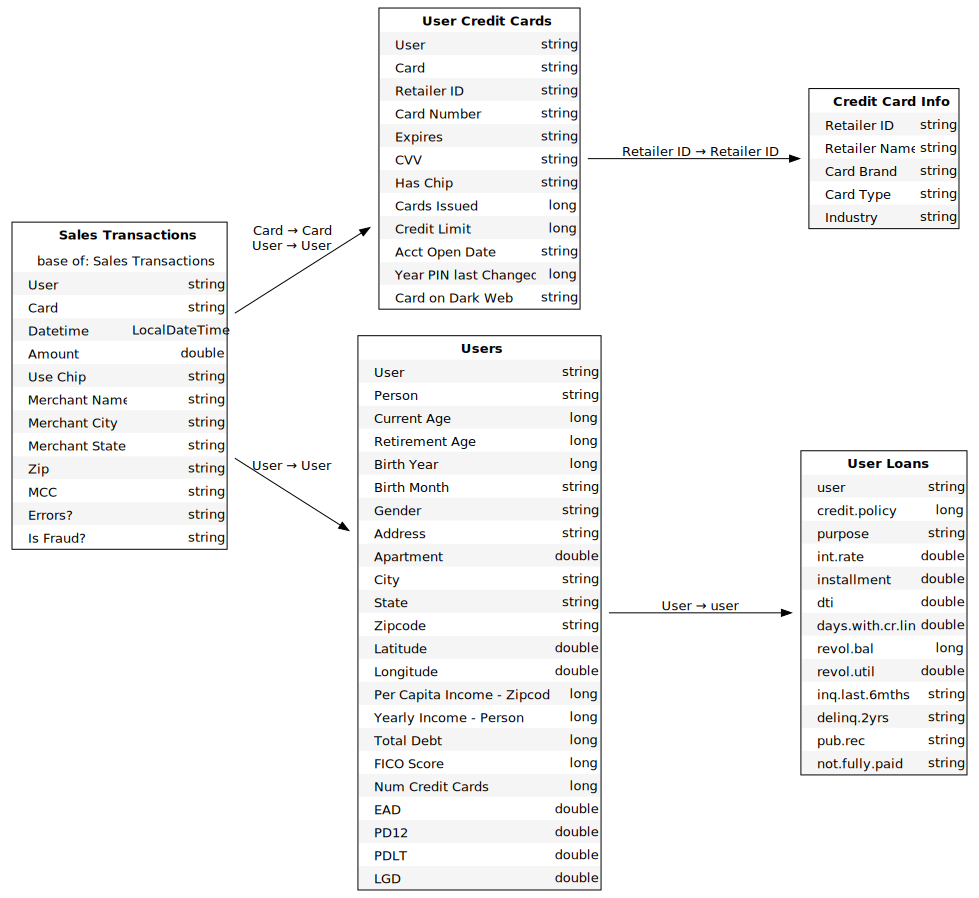

In [22]:
# View the schema
session.tables.schema

## Analyze and Create New Hierarchies, Levels, and Measures

In [23]:
# Set variables for hierarchies, levels, and measures
h, l, m = cube.hierarchies, cube.levels, cube.measures

In [24]:
# Create a multi-level date hierarchy
cube.create_date_hierarchy(
    "Date parts",
    column=cc_sales_table["Datetime"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd", "Hour": "HH"},
)

In [25]:
# Delete the old `Datetime` columnc
del h['Datetime']

In [26]:
# Create measures from joined table numerical columns
m['Num Credit Cards'] = tt.agg.single_value(users_table["Num Credit Cards"])
m['FICO Score'] = tt.agg.single_value(users_table["FICO Score"])

m['Total Debt'] = tt.agg.single_value(users_table["Total Debt"])
m['Total Debt.SUM'] = tt.agg.sum(m['Total Debt'], scope=tt.OriginScope(l["User"]))

In [27]:
# Create credit card utilization measures
m['Credit Limit.SV'] = tt.agg.single_value(user_cc_table["Credit Limit"])
m['Credit Limit.SUM'] = tt.agg.sum(m['Credit Limit.SV'], scope=tt.OriginScope(l['Card']))
# m['Credit Limit'] = tt.agg.single_value(m['Amount.SUM'] / m['Credit Limit.SUM'], scope=tt.OriginScope(l["User"]))

In [28]:
m['Cumulative Amount'] = tt.agg.sum(
    m['Amount.SUM'], scope=tt.CumulativeScope(level=l["Day"])
)

In [29]:
m['Credit Utilization'] = m['Amount.SUM'] / m['Credit Limit.SUM']

In [30]:
l

In [31]:
m["Cumulative Credit Utilization"] = tt.agg.sum(
    m['Credit Utilization'], scope=tt.CumulativeScope(level=l["Day"])
)

In [32]:
m["Cumulative Credit Utilization partitioned by Year"] = tt.agg.sum(
    m['Credit Utilization'], scope=tt.CumulativeScope(level=l["Day"], partitioning=l['Year'])
)

In [33]:
m['Revolving Balance'] = tt.agg.single_value(user_loans_table['revol.bal'])
m['Interest Rate'] = tt.agg.single_value(user_loans_table['int.rate'])
m['Days with Credit Line'] = tt.agg.single_value(user_loans_table['days.with.cr.line'])